In [1]:
from segment_anything import SamPredictor, sam_model_registry
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
checkpoint = 'checkpoints/sam_vit_l_0b3195.pth'
model_type = 'vit_l'
img_path = 'demo/src/assets/data/dogs.jpg'

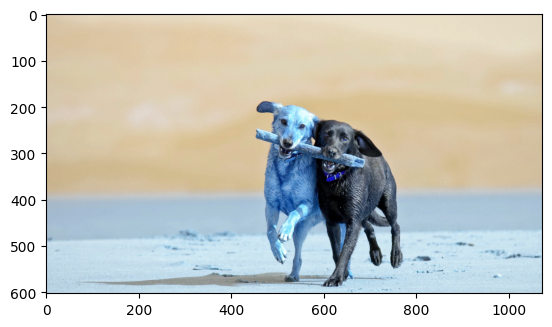

In [3]:
img = cv2.imread(img_path)
plt.imshow(img)
plt.show()

In [4]:
sam = sam_model_registry[model_type](checkpoint=checkpoint)
sam = sam.to('cuda')
predictor = SamPredictor(sam)

predictor.set_image(img)

In [5]:
masks, iou_predictions, _ = predictor.predict()

(576, 1024)
(603, 1072)


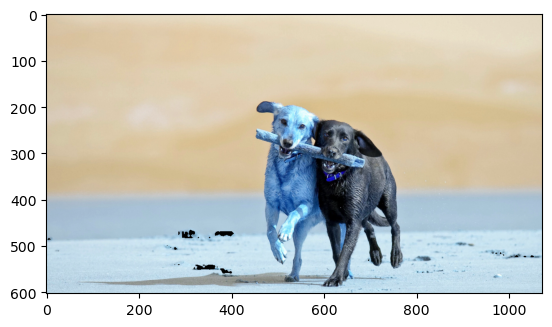

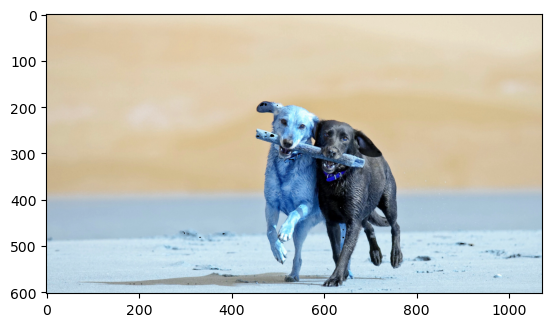

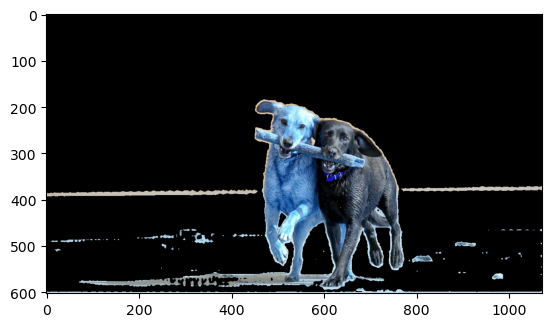

In [6]:
for mask in masks:
    
    plt.imshow(img * (1-mask[:, :, None]))
    plt.show()

In [8]:
print(iou_predictions)

[0.5089344 0.4378909 0.7100824]
